In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# NSL_9

In this noteboook it is shown how to solve the travelling salesman problem making use of a genetic alforithm. The travelling salesman problem is a classic problem of optimization in which a salesman has to visit a set of N cities on a plane with the shortest possible path. We solved this problem for a simple configuration with 32 cities on a circumference and for a configuration with 32 cities inside a square. 

The solution for both problems has been found in a computationally reasonable amount of time.

### 1D FORMALISM

First of all one has to choose the configuration to work on. In this notebbok the 1D representation will be used. A possible path that the salesman can take can be written in the form:
$$
\left[ 0, 4, 3, 1, 2 \right]
$$

where the cities are labeled by a number and they are written in the order they are visited. It is important to fix the first city to reduce the degree of freedom of the problem. Leaving the first city unfixed will create competition between solutions starting from difference cities even if we know that the best path is indipendent from the starting city.

In this formalism, the problem is reduced to the search for the minimum of the function
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

with the constraint that the set of N cities must be a permutation of  $ \left[ 0, 1, ... , N-1 \right] $

### SETTING UP THE GA

To set up a genetic algorithm it is necessary to create operators to select the best individuals from a popoulation. In this case, the population is a set of possible paths (permutation of N-cities) and the objective of the GA is to selected shorter paths with successive generation/iteration. A generation is the creation of a new population acting on the older one using selection, mutation and crossover operators.

First of all a method to selected the best individuals must be set up. In es09.cpp, the population of paths has been implemented as a matrix with the paths as rows. Starting from this matrix it is easy to build a function that rearranges the rows from the shortest path to the longest. Finally, a selection operator can be built sampling an exponential pdf with a $\tau$ characteristic factor equal to a fraction of the population (in this case $\frac{1}{2}$). The sampled number will be the index of the row (path) selected. The exponential pdf will give more probability to be picked to the shortest paths (lower row indexes).

Now some mutation operators can be built to increase the variability inside a population and avoid to fall into a local minimum of the function $L^{2}$ with no possibility of coming back. They act on 1D representation of paths making random changes leaving the first city untouched. These are the mutations used:
- swap operator: it picks two cities at random and swap them
- shift operator: it picks a random set of contiguous cities and shift them of a random amount
- continuous swap operator: it picks two random non-intersecting set of contiguous cities with equal length and swap them
- inversion operator: it picks a random set of contiguous cities and invert the order in whch they are visited

A crossover operator can be also useful to increase the variability inside the population. Crossover operators create two new individuals starting from two members of the population (parents). The crossover chosen in this implementation selects two parents using the selection operator. Then, it cut them at a certain point. The new individuals are created by replacing the cut cities in the order they appear in the original consort. This ensures that the two new individuals have mixed properties of the two parents.

### THE STRATEGY

The strategy followed to solve the two problems is the following:
1. create a starting random population (matrix with paths as rows) of 500 individuals
2. create a random 'map' (matrix with coordinates of the cities as rows) of 32 cities
3. rearrange the population from the shortest path to the longest (rearrange the population matrix). This will need both the population (list of pahts) and the map (list of cities)
4. create a new empty population
5. with a probability of 5%, select (with the selection operator) an individual, act on it with the swap operator and add it to the new population
6. do the same for the rest of the mutation operators
7. with a probability of 80%, select two individuals, use the crossover operator and add them to the new population
8. repeat from 5. to 7. until a new 500 individuals population is created (eventually eliminating the individuals in excess)
9. repeat from 3. to 8. for 1000 generations

The parameters used in this strategy can be changed after a careful test. Here are some notes to be aware of:
- reducing the population size will stretch importantly the computation time because more iterations will be needed to reach the solution
- Doing four crossovers with probability 80% insted of one will reduce the computation time because it helps selecting the shortest paths when the algorithm is near to the minimum
- The scale factor $\frac{1}{2}$ of the exponential pdf chosen for the selection operator can be lowered up to $\frac{1}{5}$ without significant change in the convergence of the GA (slight increase in computation time)

### THE RESULTS

The travelling salesman problem is solved for two configuration:
- cities placed randomly on a circumference
- cities place randomly inside a square

Both problems were solved exploiting the strategy desrcibed above.

#### CITIES ON A CIRCUMFERENCE

In [3]:
niter = np.loadtxt("circle/es09.txt", usecols=(0), skiprows=1, max_rows=1, unpack='true')
niter = int(niter)
step, best, elite_average = np.loadtxt("circle/es09.txt", usecols=(0,1,2), skiprows=3, max_rows=niter, unpack='true')
best_path = np.loadtxt("circle/es09.txt", skiprows=niter+3, max_rows=1)
x_city, y_city = np.loadtxt("circle/map.txt", usecols=(0,1), unpack='True')

Best route = [ 0. 19. 16.  7. 14. 30. 22. 31. 25. 26. 21. 20. 13. 15. 12. 29. 11. 27.
  5.  8.  9.  2. 23. 28.  1. 24.  6. 17. 18.  3. 10.  4.]
Best route length = 2.58237


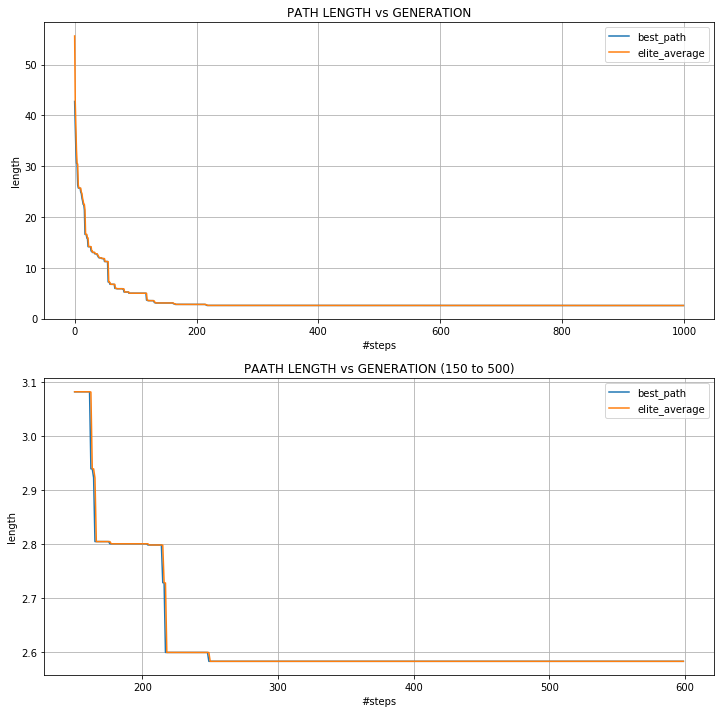

In [4]:
fig, axx = plt.subplots(2, 1,figsize=(12, 12))
axx.reshape(-1)

ax = axx[0]
ax.errorbar(step, best, label = 'best_path')
ax.errorbar(step, elite_average, label = 'elite_average')
ax.set_title("PATH LENGTH vs GENERATION")
ax.set_xlabel(f"#steps")
ax.set_ylabel(f"length")
ax.legend()
ax.grid(True)
print('Best route = '+str(best_path))
print('Best route length = '+str(best[-1]))

ax = axx[1]
start = 150
end = 600
ax.errorbar(step[start:end], best[start:end], label = 'best_path')
ax.errorbar(step[start:end], elite_average[start:end], label = 'elite_average')
ax.set_title("PAATH LENGTH vs GENERATION (150 to 500)")
ax.set_xlabel(f"#steps")
ax.set_ylabel(f"length")
ax.legend()
ax.grid(True)

The first one is a graph showing the path length of the shortest individual in the population (best_path) and the average path of the shortest half of the population (elite_average) as a function of the number of iterations. It is noticeable that the algorithm converges to a best path of length 2.58237 (see above the graph). In this case the algorithm is pretty quick to find the shortest path because the configuration to solve is easy. In fact, from the second graph, which is a focus of the first, it can be seen that the algorithm does not spend too much time in a single solution but it moves quickly to the shortest one in around ~250 iterations.

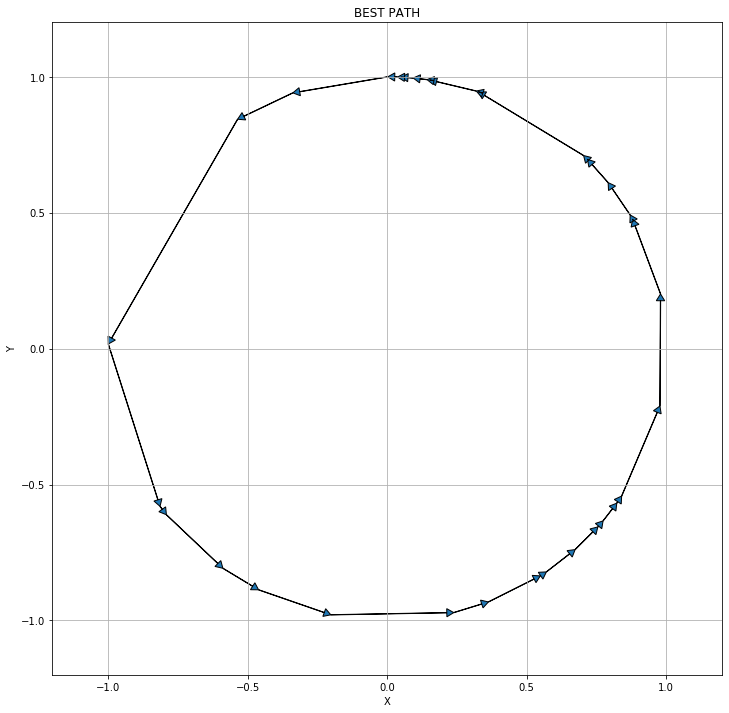

In [5]:
x_path = [ x_city[int(k)] for k in best_path ]
y_path = [ y_city[int(k)] for k in best_path ]

fig, ax = plt.subplots(1, 1,figsize=(8, 8))
#ax.plot(x_path, y_path, marker = 's')
for i in range(len(x_path)-1):
    ax.arrow(x_path[i],y_path[i],x_path[i+1]-x_path[i],y_path[i+1]-y_path[i],head_width=0.03, head_length=0.025, length_includes_head='yes')
ax.arrow(x_path[-1],y_path[-1],x_path[0]-x_path[-1],y_path[0]-y_path[-1],head_width=0.03, head_length=0.025,length_includes_head='yes')
ax.set_title("BEST PATH")
ax.set_xlabel(f"X")
ax.set_ylabel(f"Y")
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.grid(True)

The picture shows the best path find by the GA. It is clearly the shortest (there are no crossing lines and all the heads point in the same directions).

#### SQUARE

In [2]:
niter = np.loadtxt("square/es09.txt", usecols=(0), skiprows=1, max_rows=1, unpack='true')
niter = int(niter)
step, best, elite_average = np.loadtxt("square/es09.txt", usecols=(0,1,2), skiprows=3, max_rows=niter, unpack='true')
best_path = np.loadtxt("square/es09.txt", skiprows=niter+3, max_rows=1)
x_city, y_city = np.loadtxt("square/map.txt", usecols=(0,1), unpack='True')

Best route = [ 0. 31. 17. 19. 21. 10. 15. 28. 18. 23.  9.  3. 12.  6. 25. 16.  1. 26.
  4. 24. 22. 27. 14. 29.  2.  5.  7. 20. 13. 11. 30.  8.]
Best route length = 4.32543


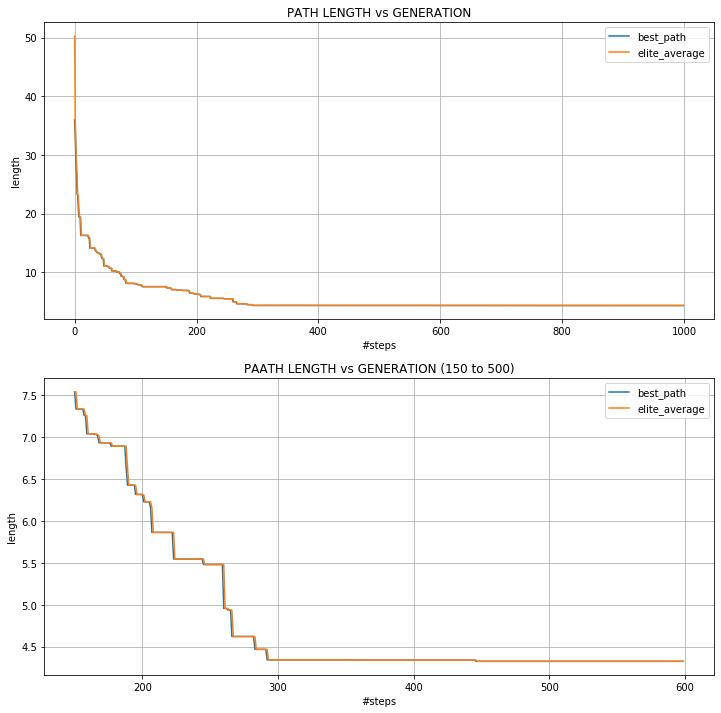

In [3]:
fig, axx = plt.subplots(2, 1,figsize=(12, 12))
axx.reshape(-1)

ax = axx[0]
ax.errorbar(step, best, label = 'best_path')
ax.errorbar(step, elite_average, label = 'elite_average')
ax.set_title("PATH LENGTH vs GENERATION")
ax.set_xlabel(f"#steps")
ax.set_ylabel(f"length")
ax.legend()
ax.grid(True)
print('Best route = '+str(best_path))
print('Best route length = '+str(best[-1]))

ax = axx[1]
start = 150
end = 600
ax.errorbar(step[start:end], best[start:end], label = 'best_path')
ax.errorbar(step[start:end], elite_average[start:end], label = 'elite_average')
ax.set_title("PATH LENGTH vs GENERATION (150 to 500)")
ax.set_xlabel(f"#steps")
ax.set_ylabel(f"length")
ax.legend()
ax.grid(True)

The first one is a graph showing the path length of the shortest individual in the population (best_path) and the average path of the shortest half of the population (elite_average) as a function of the number of iterations. The algorithm converges to a best path of length 4.32543 (see above the graph). It is interesting to see that the more the algorithm is near to the final minimum (we don't know if it is the global one) of the function the more time it spends getting precise. This is simply beacuse it is stuck in local minimum and it can come out of them thanks only to mutations/crossover. In particular, this is visible in the second graph. It is a focus on the iterations from 150 to 600. It can be seen that the algorithm spends around 100 steps in a local minimum and only after ~450 iterations reaches the real minimum.

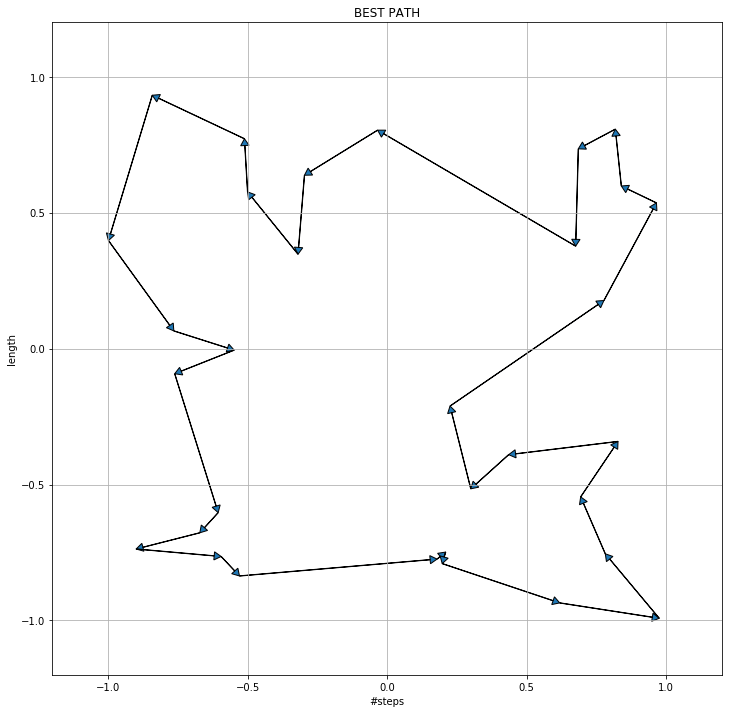

In [4]:
x_path = [ x_city[int(k)] for k in best_path ]
y_path = [ y_city[int(k)] for k in best_path ]

fig, ax = plt.subplots(1, 1,figsize=(8, 8))
#ax.plot(x_path, y_path, marker = 's')
for i in range(len(x_path)-1):
    ax.arrow(x_path[i],y_path[i],x_path[i+1]-x_path[i],y_path[i+1]-y_path[i],head_width=0.03, head_length=0.025, length_includes_head='yes')
ax.arrow(x_path[-1],y_path[-1],x_path[0]-x_path[-1],y_path[0]-y_path[-1],head_width=0.03, head_length=0.025,length_includes_head='yes')
ax.set_title("BEST PATH")
ax.set_xlabel(f"#steps")
ax.set_ylabel(f"length")
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.grid(True)

The picture shows the best path find by the GA. It cannot be said if it is the shortest (spoiler:it's not) but it can be considered a good approximation of the global minimum because it is non-intersecting.